<a href="https://colab.research.google.com/github/tarun11185/Data/blob/main/Algerian_Forest_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**


*   The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeat of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

*   Using the dataset we can clarify what are the circumstances which lead to forest fire.

*   Predection result can be used to take corrective action or prevent the mishap.










**Data Collection**

*   The dataset is collected from UCI website, provided by Center for Development of Advanced
Technologies (CDTA).
*  122 instances for each region. 


*   The period from June 2012 to September 2012.
*The dataset includes 11 attributes and 1 output attribute (class)

*   The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.







In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


**Importing the dataset & Cleaning the Dataset** 

In [2]:
url ='https://raw.githubusercontent.com/tarun11185/Data/main/Algerian_forest_fires.csv'
df=pd.read_csv(url,encoding='unicode_escape',header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df[0:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


**Dataset contains the combined values for two regions, We have to segerated the regions and remove irrevelant data**

In [5]:
# Removing Unnecessary Rows from Dataset
df = df.drop(labels=[122,123],axis=0)

In [6]:
df[0:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [7]:
## Drop the index and reset the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True) # As data is related to single year 2012 we can delete year column

In [8]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**Adding Region Feature**

We have Dataset of two regions


*   Bejaia Region Dataset
*   Sidi-Bel Abbes Region Dataset

We can classify region as 0 & 1. 

*   Bejaia Region = 0
*   Sidi-Bel Abbes = 1



Sidi-Bel Abbes Region begins from 122 to last (including 122) and Bejaia Region Dataset from start to 122 (excluding 122)






In [9]:
## Creating New Feature Region 
df.loc[:122,'region']= 0
df.loc[122:,'region']= 1

In [10]:
## Checking top 5 rows
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df[:122]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0


In [12]:
df[122:]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [13]:
df.shape

(244, 14)

**Feature Information**


*   Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather Data observations**


*   Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
*   RH : Relative Humidity in %: 21 to 90

*   Ws :Wind speed in km/h: 6 to 29
*   Rain: total day in mm: 0 to 16.8


**Fire Weather Index (FWI) Components**



*   Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
*   Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9


*   Drought Code (DC) index from the FWI system: 7 to 220.4

*   Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
*   Buildup Index (BUI) index from the FWI system: 1.1 to 68

*   Fire Weather Index (FWI) Index: 0 to 31.1

*   Classes: two classes, namely Fire and not Fire














In [14]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

**Removing spaces from Columns**


*   There is spaces in columns head names so we need to remove them.



In [16]:
# Removing spaces from column head
df.columns =[col_name.strip() for col_name in df.columns]

In [17]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [18]:
## Classes label
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

**We have extra space in classes so we have to remove it**

In [19]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [20]:
df[df['Classes'].isnull()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [21]:
## Replace the Classes value with mode
mode_Value = df['Classes'].mode()
df['Classes'].fillna(value=mode_Value[0],inplace=True)

## Replace the FWI value with nan later will replace it with  Median after changing the dtypes
df.FWI[165] = np.nan

## Repalce the blank space in DC
df['DC']= df.DC.apply(lambda x:x.replace(" ",""))

In [22]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,fire,1.0
166,15,07,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0


In [23]:
df['Classes'] = np.where(df['Classes']=='fire',1,0)

In [24]:
# Checking the Datatypes in a Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   Temperature  244 non-null    object 
 3   RH           244 non-null    object 
 4   Ws           244 non-null    object 
 5   Rain         244 non-null    object 
 6   FFMC         244 non-null    object 
 7   DMC          244 non-null    object 
 8   DC           244 non-null    object 
 9   ISI          244 non-null    object 
 10  BUI          244 non-null    object 
 11  FWI          243 non-null    object 
 12  Classes      244 non-null    int64  
 13  region       244 non-null    float64
dtypes: float64(1), int64(1), object(12)
memory usage: 26.8+ KB


**Changing the datatypes to Numerical from**

In [25]:
df = df.astype({'day':np.int64,'month':np.int64,'Temperature':np.int64,'RH':np.int64, 
                'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64,'DMC':np.float64,
                'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,'FWI':np.float64})


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      244 non-null    int64  
 13  region       244 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 26.8 KB


In [27]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,1,1.0
166,15,7,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,1,1.0


**Fixing the Nan value in FWI**

In [28]:
# Fixing the nan value in FWI

median = df['FWI'].median()
df['FWI'].fillna(median,inplace=True)

In [29]:
df[165:167]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,4.2,1,1.0
166,15,7,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,1,1.0


In [30]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [31]:
df.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
243,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


**Shape of Dataset**

In [32]:
df.shape

(244, 14)

**We have total 244 rows and 14 columns present**

In [33]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [34]:
# Checking Null Values

df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

**There is no Null values in the Dataset**

In [35]:
df[df.duplicated()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


**There is no duplicated value in the dataset**

**Exploratary Analysis of the Features**

In [36]:
df1 = df.groupby(['Classes','region']).agg({'Classes':['count']})
df1

Classes
                 count
Classes region        
0       0.0         63
        1.0         43
1       0.0         59
        1.0         79

**For Classes**


*  0 = Not Fire
*  1 = Fire

**Region**
*   0 = Bejaia
*   1 = Sidi-Bel Abbes



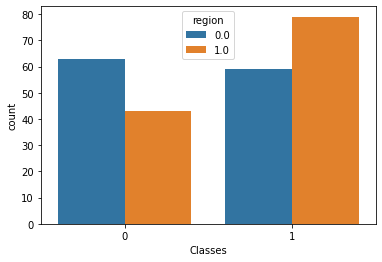

In [37]:
sns.countplot(data=df, x='Classes', hue='region');

**Remark**


*   Above graph shows that Sidi-Bel Abbes region has more occurence of fire than Bejaia region.
*   There is more occurence of fire.



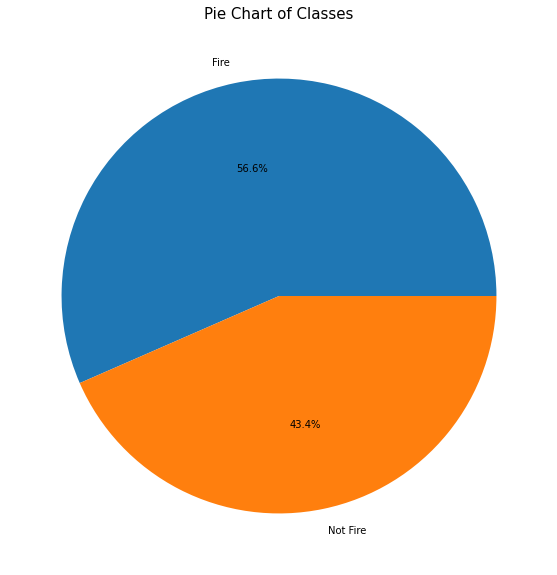

In [38]:
percentage=df.Classes.value_counts(normalize=True)*100
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

In [39]:
# Printing all the numeric column
numeric_col = [feature for feature in df.columns if feature not in ['Classes','region']]
print('We have {} numeric features :{}'.format(len(numeric_col) ,numeric_col))

We have 12 numeric features :['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


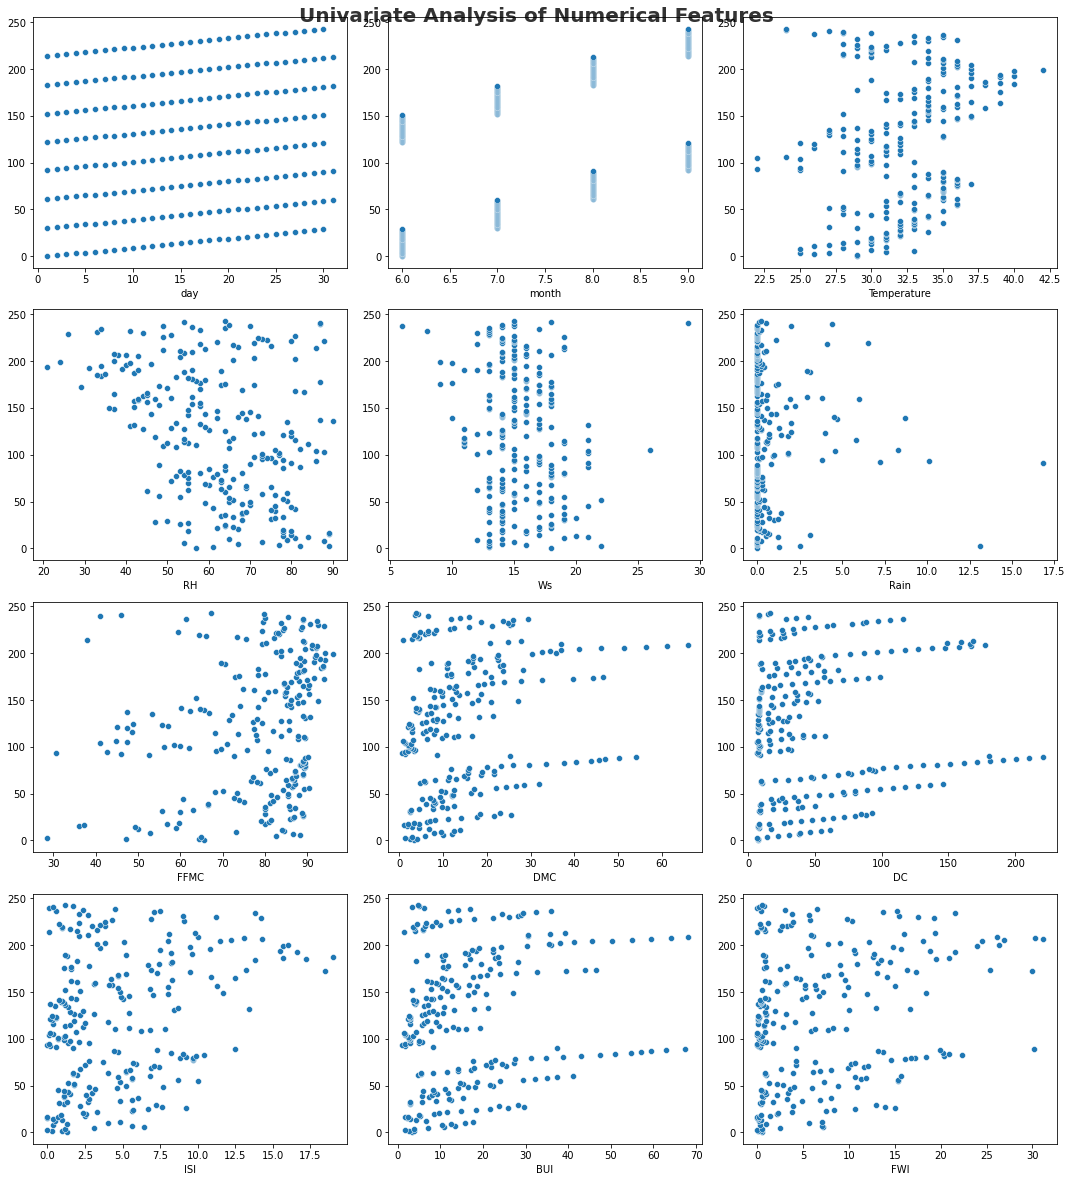

In [40]:
# Scatterplot
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=df[numeric_col[i]],y=df.index,data=df)
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

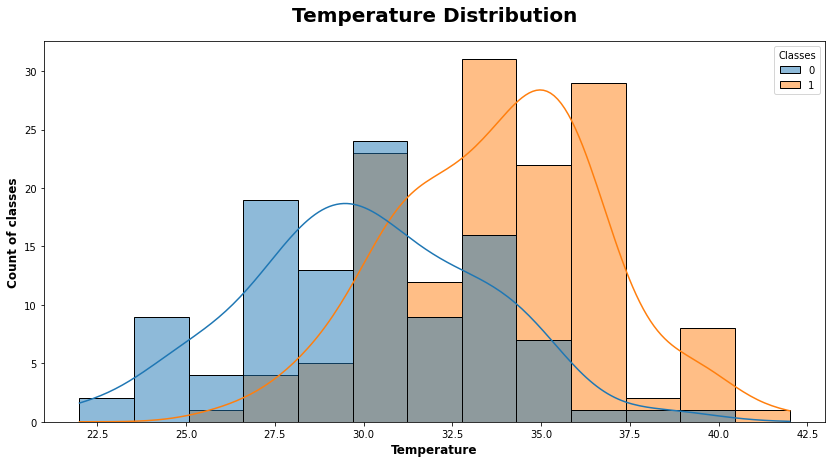

In [41]:
features = ['Temperature', 'Classes']
Temperature_df = df[features]
plt.subplots(figsize=(14,7))
sns.histplot( data=Temperature_df,x=Temperature_df['Temperature'], hue='Classes', color = 'g',kde=True)
#sns.histplot(Temperature_df.Temperature, color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of classes", weight="bold", fontsize=12)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

**Above graph shows that Fire occured between 32 to 42.5 degree.**

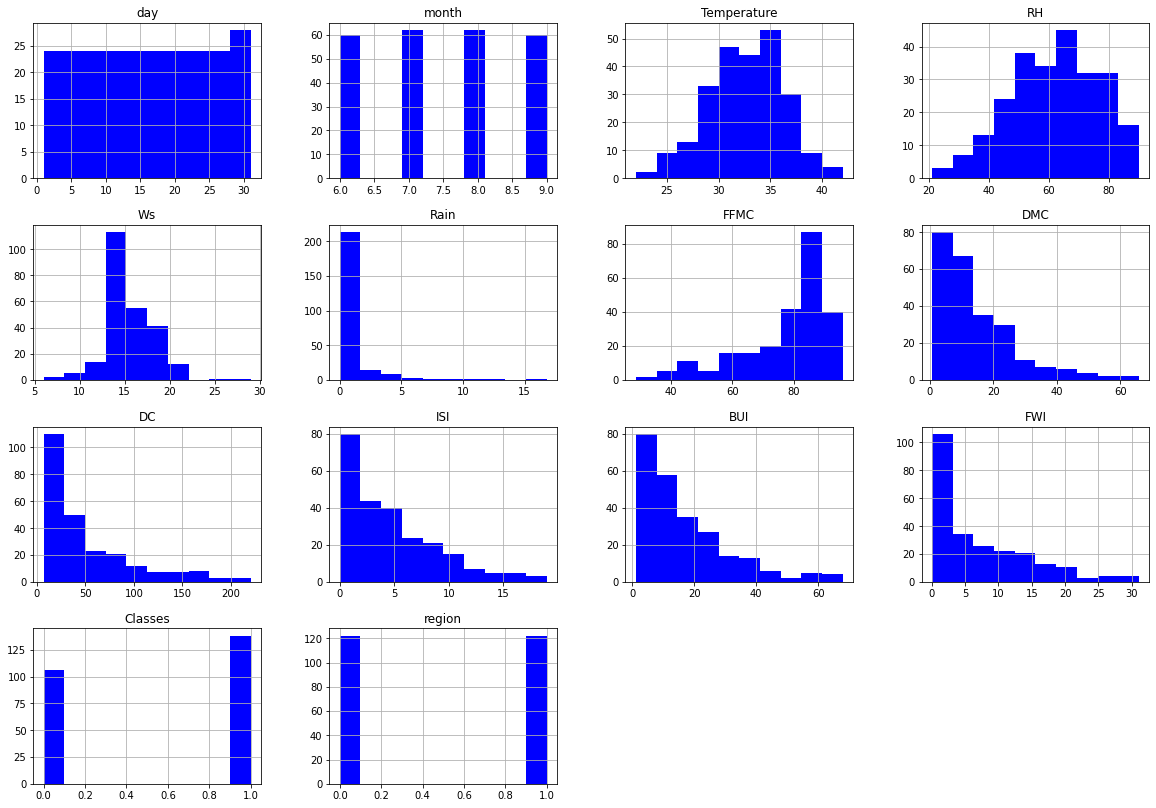

In [42]:
df.hist(figsize=(20,14),color='blue');

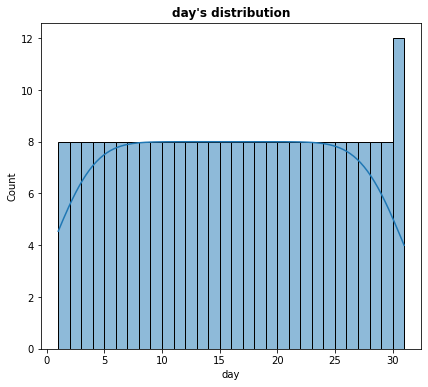

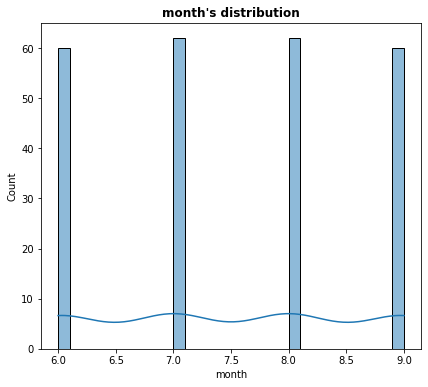

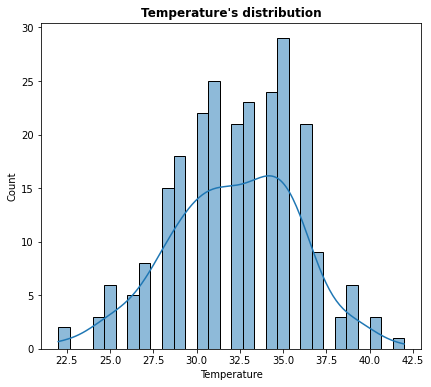

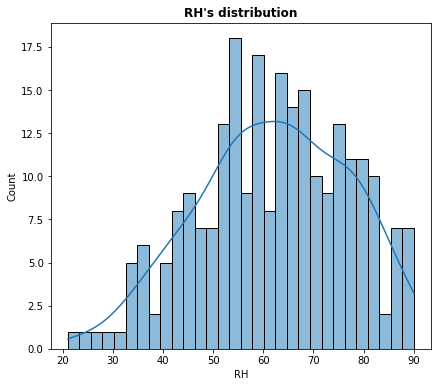

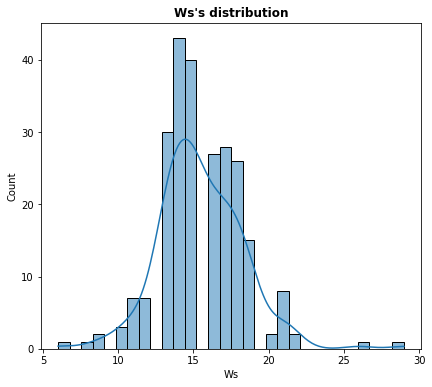

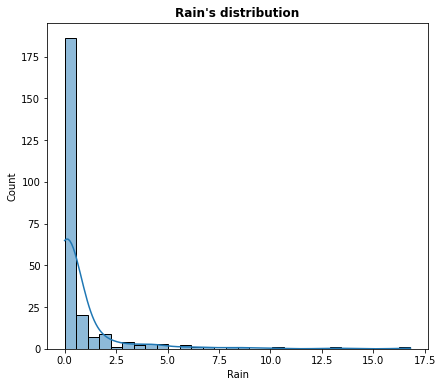

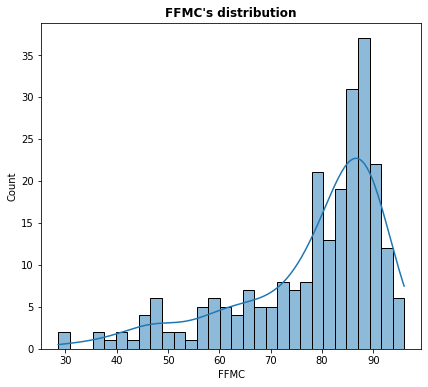

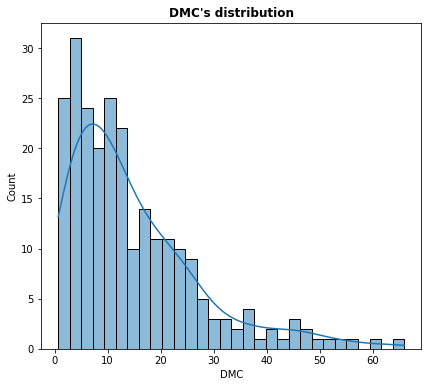

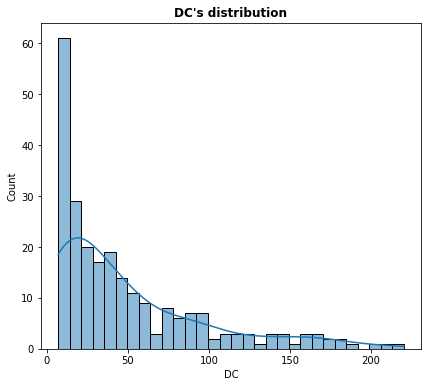

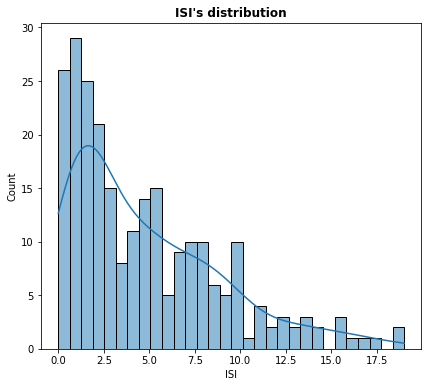

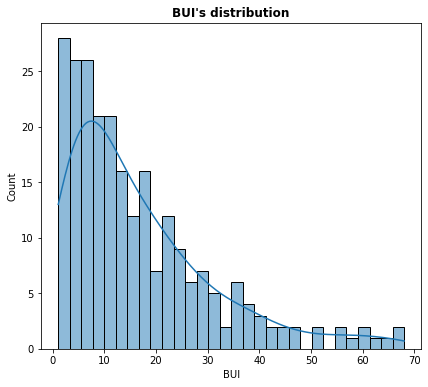

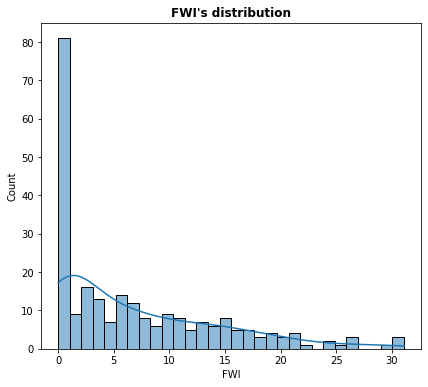

In [43]:
# Checking distribution of Numerical features
for i in numeric_col:
  plt.figure(figsize=(15,6))
  plt.subplot(121)
  sns.histplot(data=df, x=i, kde=True, bins=30)
  plt.title("{}'s distribution".format(i),fontweight="bold")

**Observations**


*   Features like Rain, DMC, DC, ISI, BUI, FWI follow log normal distribution (Right Skewed).
*   FFMC is left skewed.
*   Ws is slightly right skewed.
*   Features Rain, FMCC, DMC, ISI, FWI are having more outliers. 










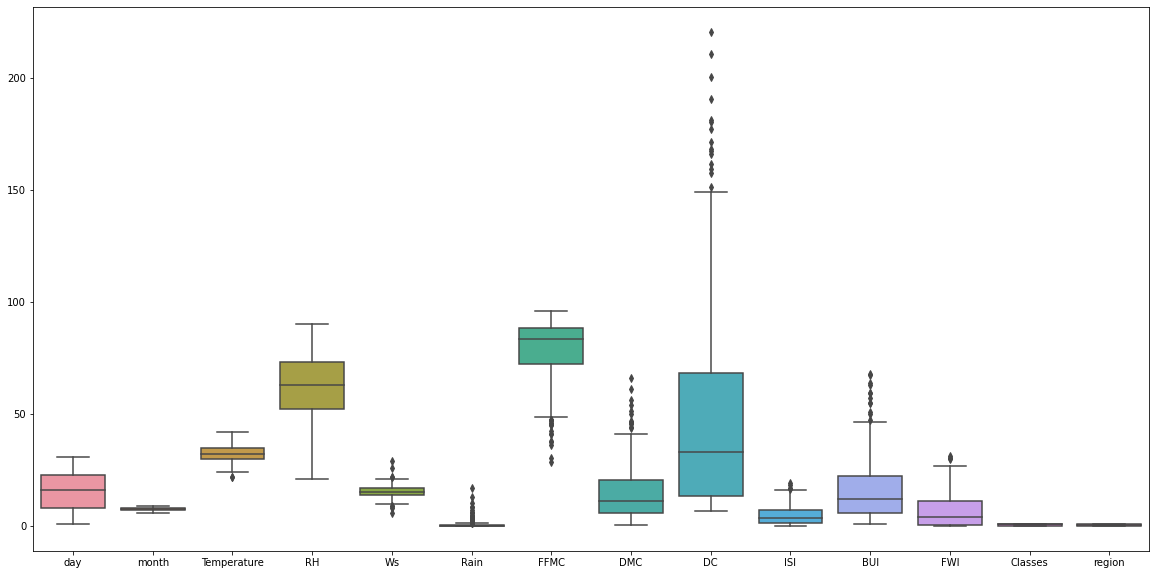

In [44]:
## Boxplot to find Outliers in the Features
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient="v");

**Observation**


*   Relative Humidity,RH does not have any outilers.
*   Temperature & FFMC have outliers in Lower boundary side.
*   Wind Speed has outliers on both sides of boundary.
*   Rain,DMC,DC,ISI,BUI & FWI have outliers in upper boundary side.





**Univariate Analysis**

*   The purpose of univariate analysis is to understand the distribution of values for a single variable.



**Bivariate Analysis**


*   Bivariate analysis helps us to find the relationship between two variables.

**Multivariate Analysis**


*   Scatterplot.
*   Pairplot.
*   Heatmap(To check correlation between feature)
*   Box plot(To check the outliers within a feature)
*   Lineplot (To check trend in numerical feature with time)
*   Strip Plot(To check relationship between Categorical Vs Numerical)









In [45]:
# Finding Correlation between Classes & Features

df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350960,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083285,0.022333,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.507132,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.735511,2.684206e-01


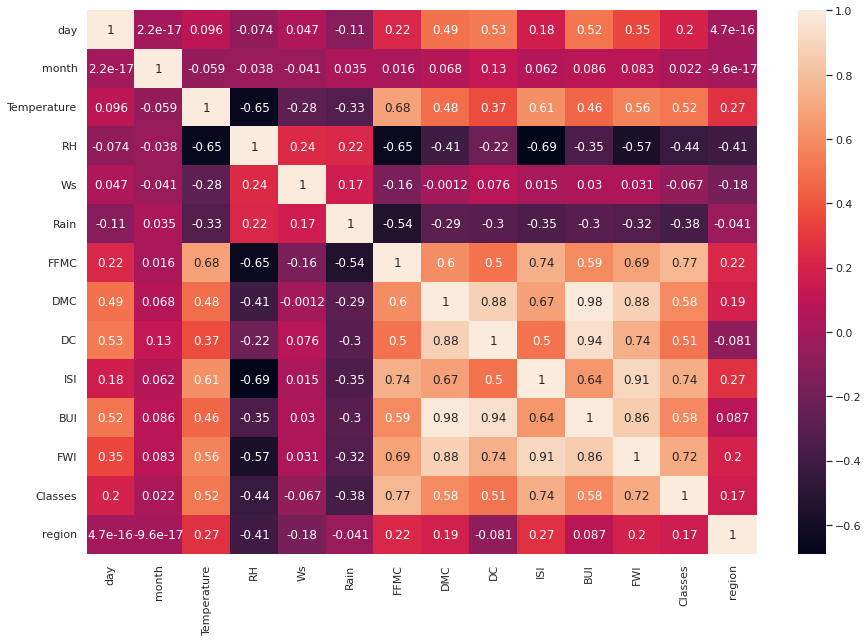

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)
plt.show();

**Insight**


*   RH is negatively corelated with Temperature,FFMC & ISI.
*   Rain is negatively correlated with Temperature, FFMC, DMC, ISI & BUI. Humidity in environment will decrease the chance of wild fire.


*   Duff moisture code & build index are very strongly correlated.
*   Drought Code & Buildup index are also strongly correlated





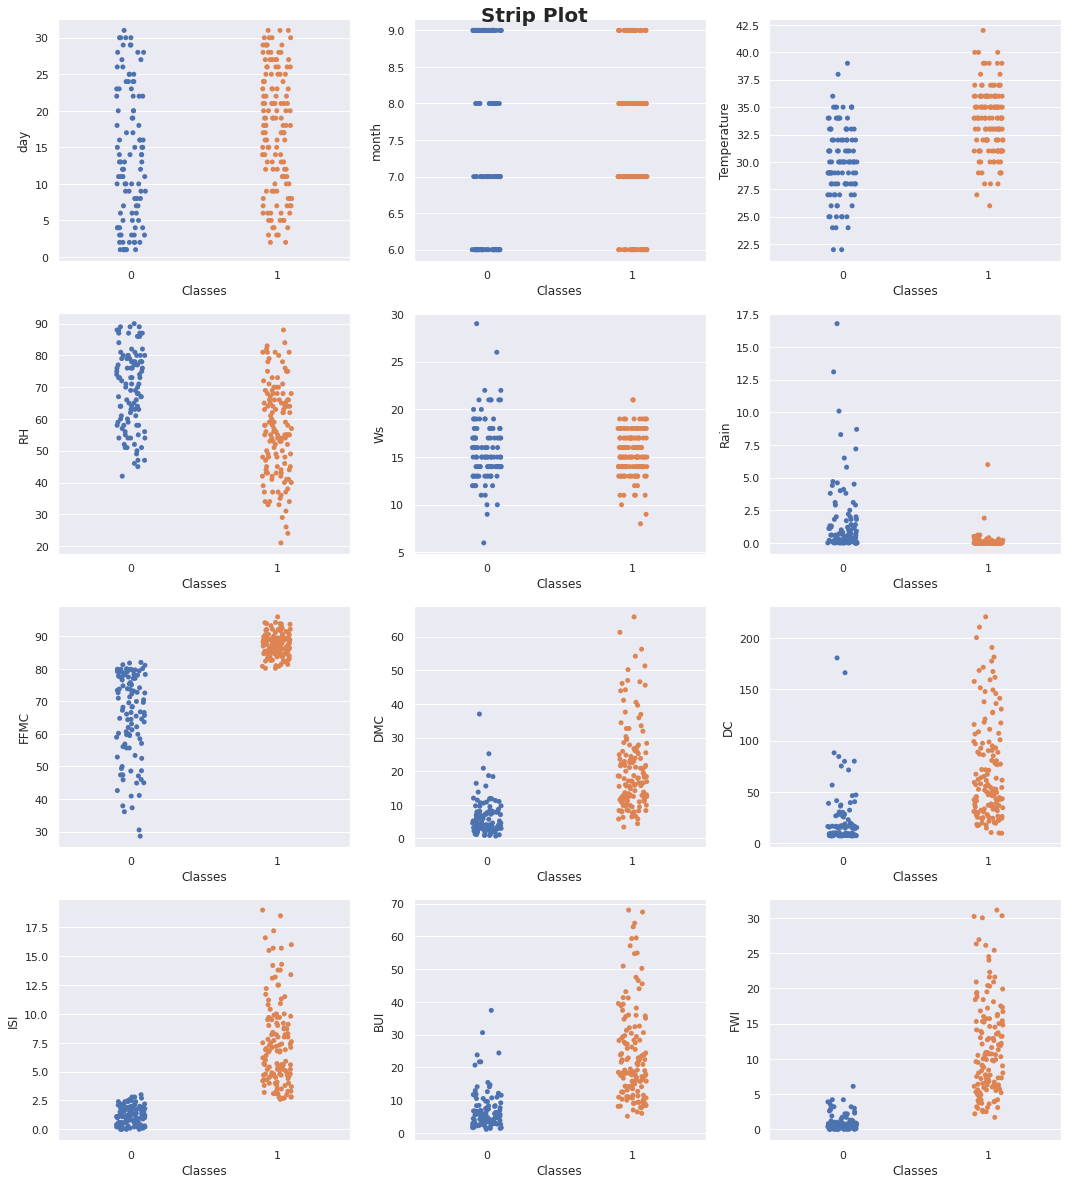

In [47]:
# Stir plot to see the relationship between numerical & Target

plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_col)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_col[i], x='Classes', data=df)
    plt.tight_layout()

**From above it is clearly showing most of the time there is more fire.**

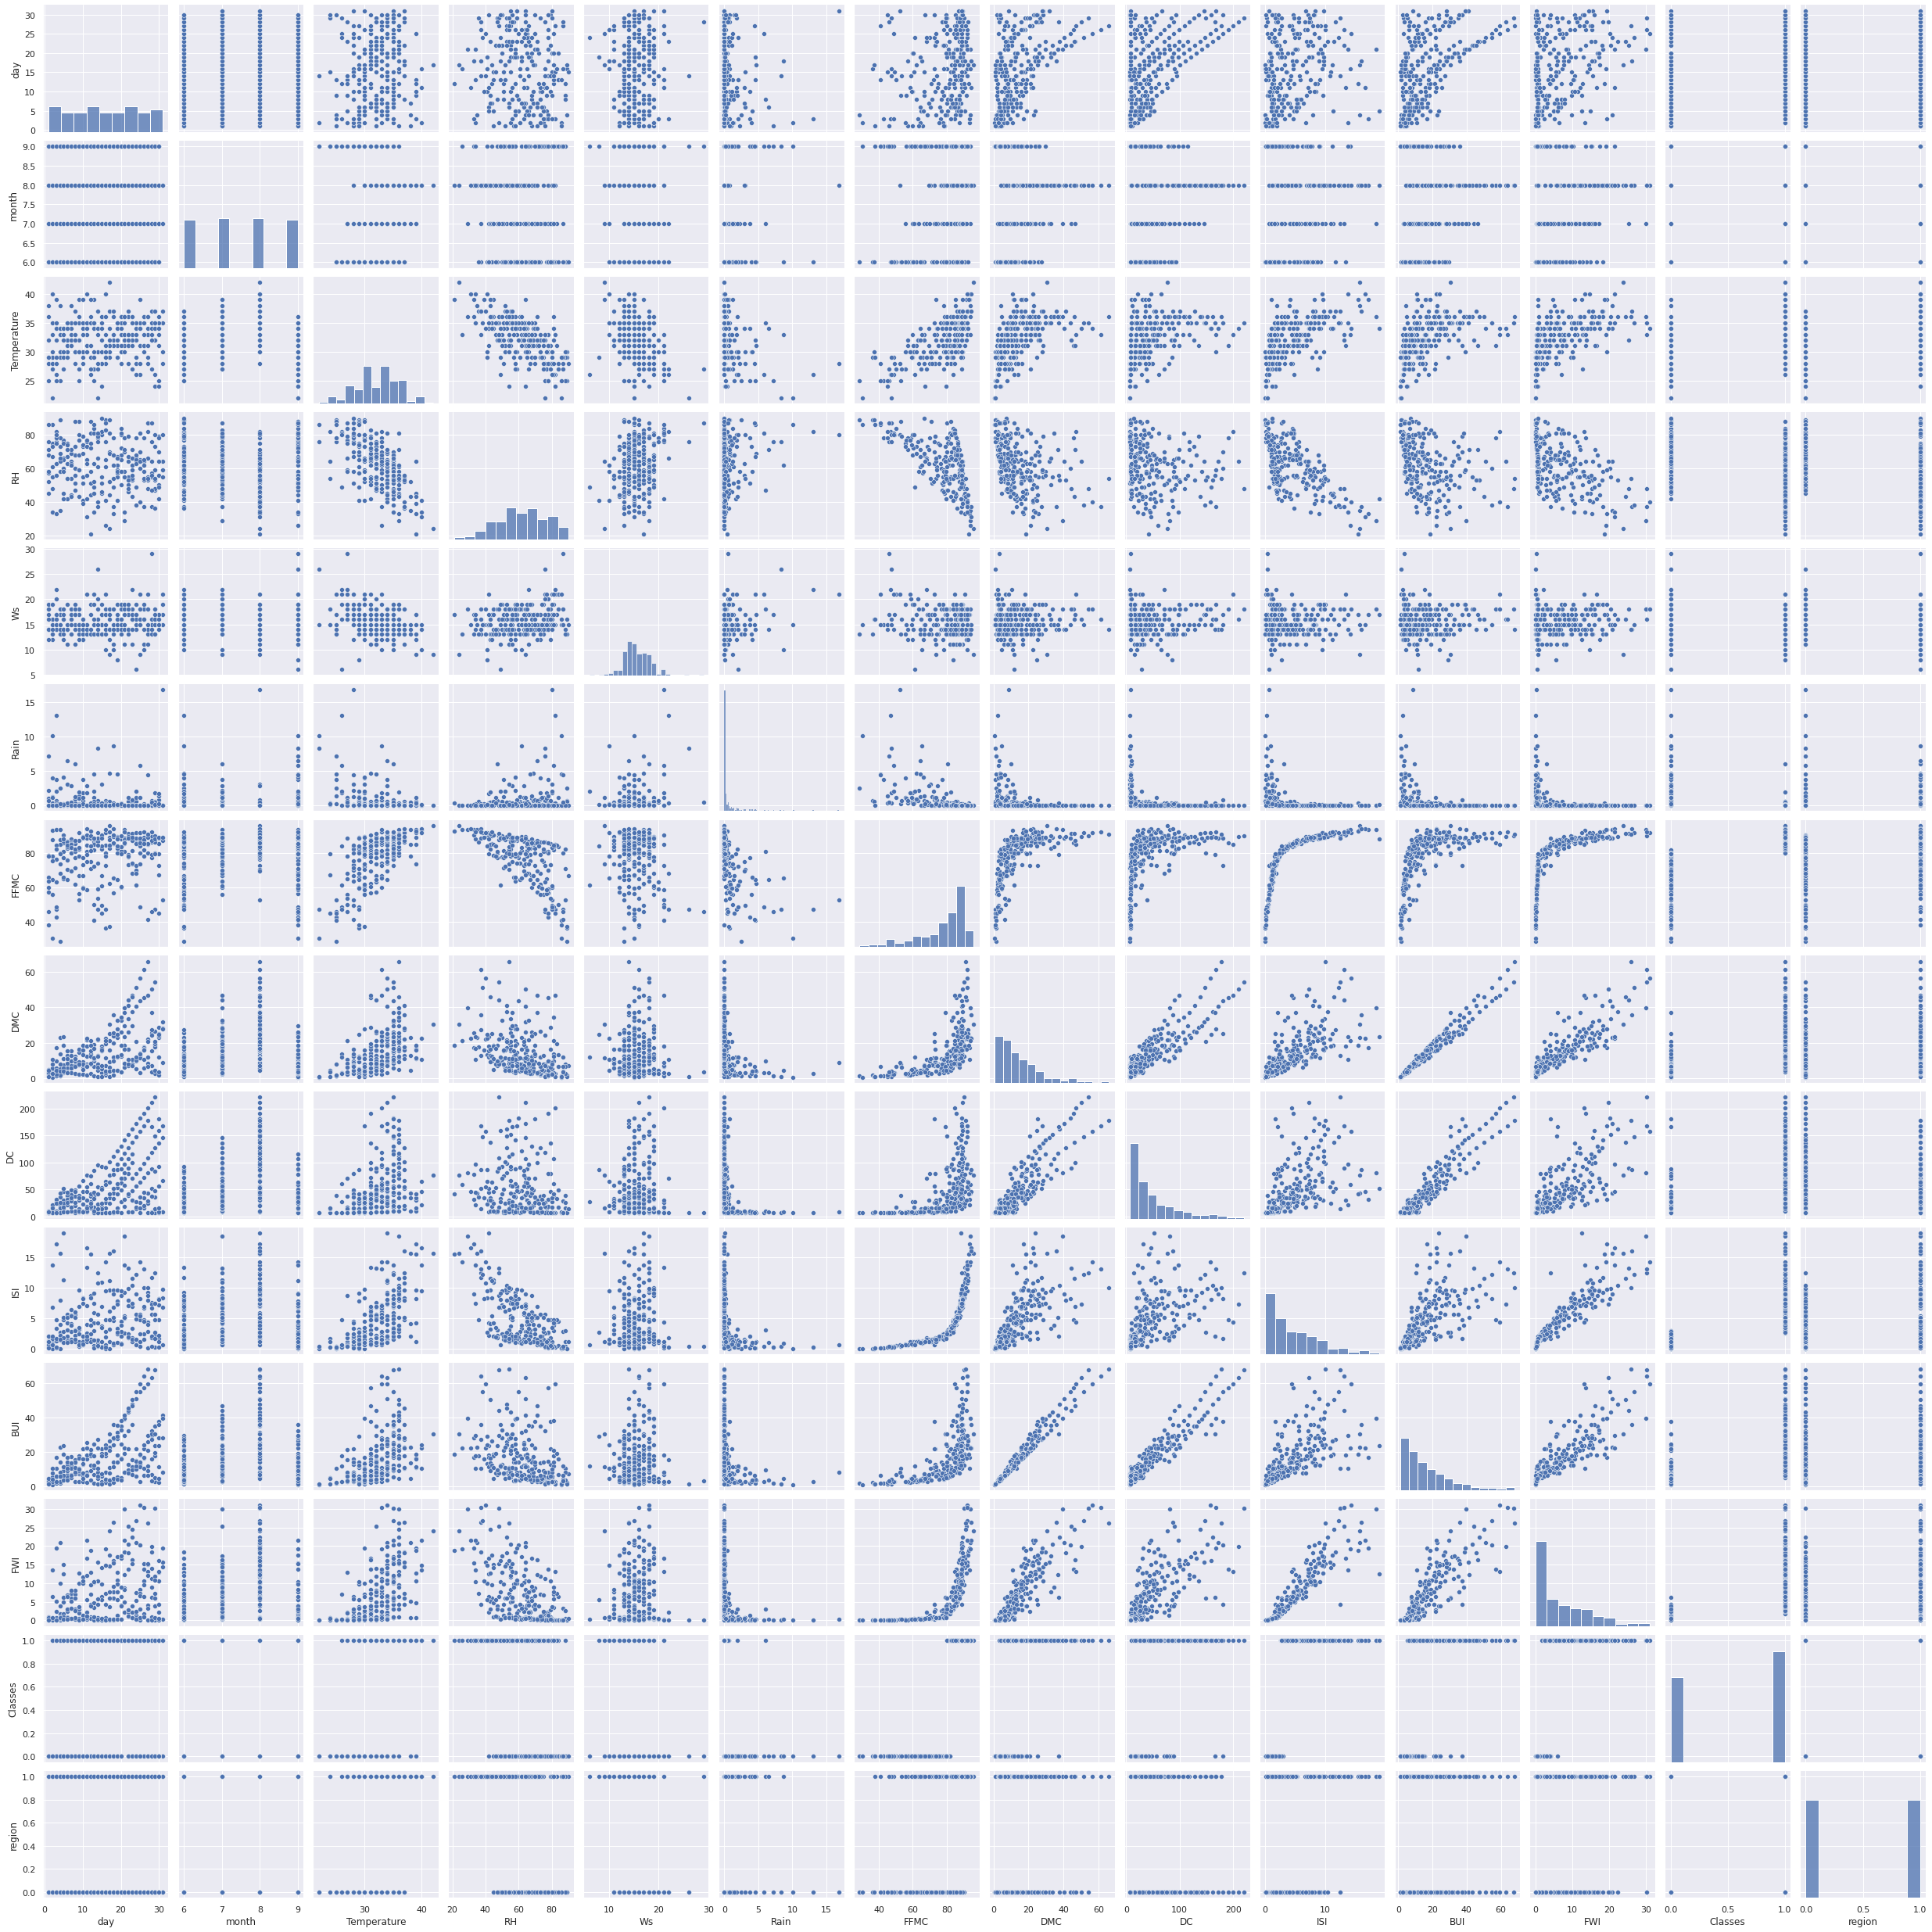

In [ ]:
sns.pairplot(df);

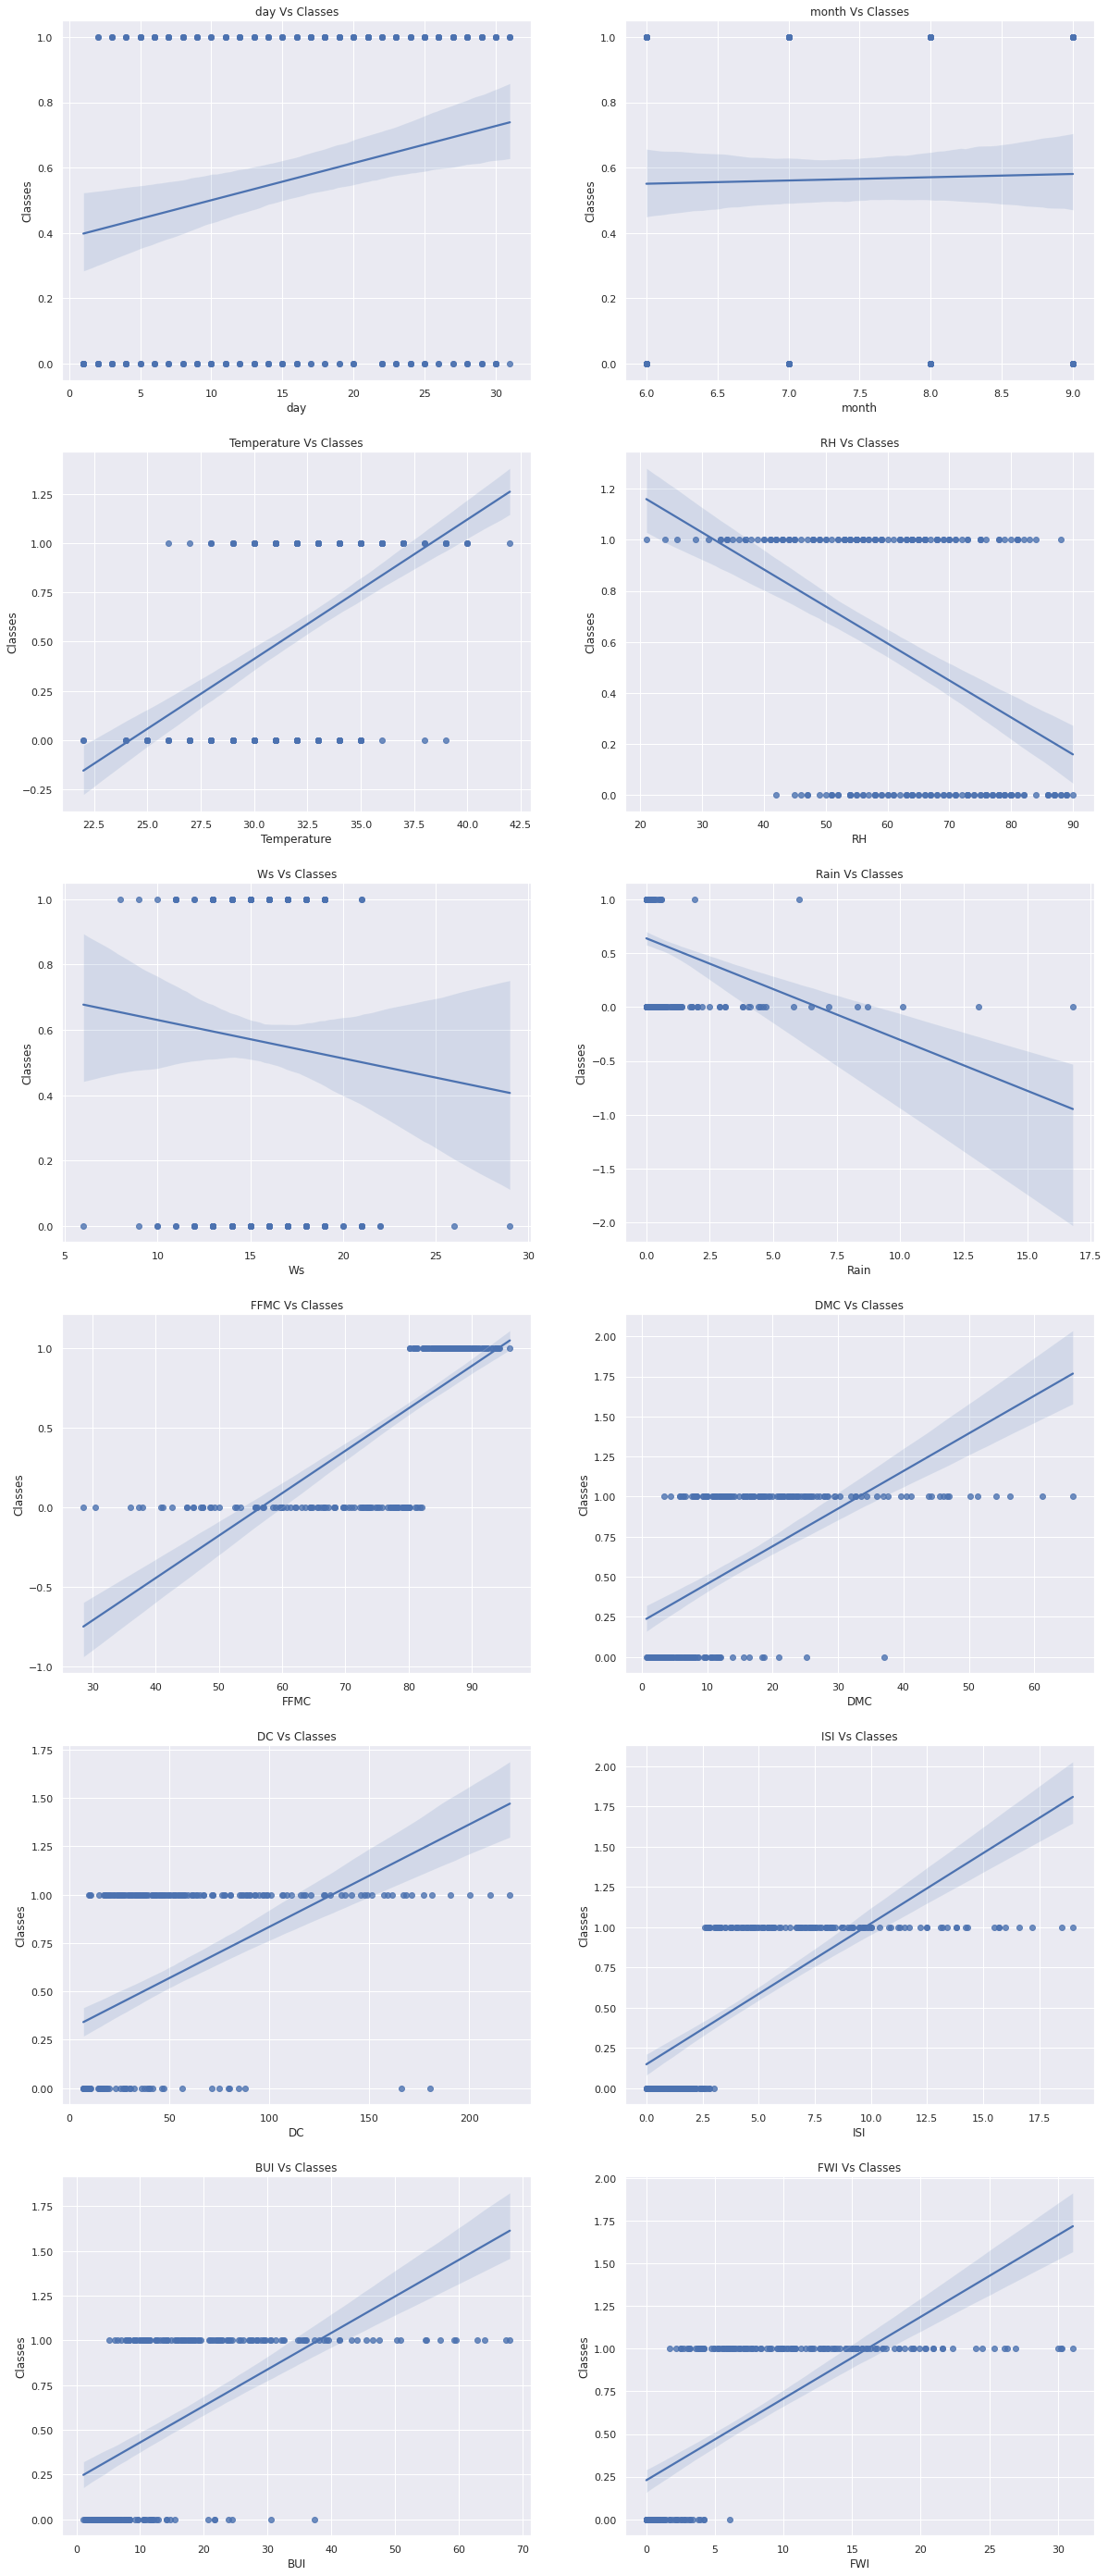

In [ ]:
plt.figure(figsize=(20,50))
for i in enumerate(numeric_col):
  plt.subplot(6, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(8,10)})
  sns.regplot(data=df, x=i[1], y='Classes')
  plt.xlabel(i[1])
  plt.ylabel("Classes")
  plt.title("{} Vs Classes".format(i[1]))

**Observation**




*   Places with higher temperature has more fire.
*   Places with lower RH has fire.

*   Places wiht ffmc > 80 has fire.
*   Places wiht ISI > 2.5 has fire.

*   Places with FWI > 4 has fire.
*   Places with more rain has less fire.
